# 4. 인구 데이터 분석
* 인구수 변동 현황
* 가장 인구수가 많이 증가한 지역
* 가장 인구수가 많이 감소한 지역
* 가장 평균 연령이 낮은 지역
* 10~20대가 가장 많은 지역
* 노령층이 가장 많은 지역

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('population.csv', thousands=',')
df.head()

,행정구역,2011년_총인구수,2011년_세대수,2011년_남자 인구수,2011년_여자 인구수,2012년_총인구수,2012년_세대수,2012년_남자 인구수,2012년_여자 인구수,2013년_총인구수,...,2018년_남자 인구수,2018년_여자 인구수,2019년_총인구수,2019년_세대수,2019년_남자 인구수,2019년_여자 인구수,2020년_총인구수,2020년_세대수,2020년_남자 인구수,2020년_여자 인구수
0,전국,50734284,20033142,25406934,25327350,50948272,20211770,25504060,25444212,51141463,...,25866129,25959930,51849861,22481466,25864816,25985045,51829023,23093108,25841029,25987994
1,서울,10249679,4192752,5073899,5175780,10195318,4177970,5041336,5153982,10143645,...,4773899,4991724,9729107,4327605,4744059,4985048,9668465,4417954,4701723,4966742
2,부상,3550963,1381257,1762848,1788115,3538484,1389526,1754479,1784005,3527635,...,1692421,1749032,3413841,1497908,1675417,1738424,3391946,1530431,1661000,1730946
3,대구,2507271,940770,1251577,1255694,2505644,948652,1249320,1256324,2501588,...,1219342,1242427,2438031,1031251,1205286,1232745,2418346,1056627,1193109,1225237
4,인천,2801274,1077563,1410980,1390294,2843981,1097491,1431593,1412388,2879782,...,1481844,1472798,2957026,1238641,1482249,1474777,2942828,1267956,1473943,1468885


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   행정구역          18 non-null     object
 1   2011년_총인구수    18 non-null     int64 
 2   2011년_세대수     18 non-null     int64 
 3   2011년_남자 인구수  18 non-null     int64 
 4   2011년_여자 인구수  18 non-null     int64 
 5   2012년_총인구수    18 non-null     int64 
 6   2012년_세대수     18 non-null     int64 
 7   2012년_남자 인구수  18 non-null     int64 
 8   2012년_여자 인구수  18 non-null     int64 
 9   2013년_총인구수    18 non-null     int64 
 10  2013년_세대수     18 non-null     int64 
 11  2013년_남자 인구수  18 non-null     int64 
 12  2013년_여자 인구수  18 non-null     int64 
 13  2014년_총인구수    18 non-null     int64 
 14  2014년_세대수     18 non-null     int64 
 15  2014년_남자 인구수  18 non-null     int64 
 16  2014년_여자 인구수  18 non-null     int64 
 17  2015년_총인구수    18 non-null     int64 
 18  2015년_세대수     18 non-null     int64 
 19  2015년_남자 인

In [4]:
df.head()

,행정구역,2011년_총인구수,2011년_세대수,2011년_남자 인구수,2011년_여자 인구수,2012년_총인구수,2012년_세대수,2012년_남자 인구수,2012년_여자 인구수,2013년_총인구수,...,2018년_남자 인구수,2018년_여자 인구수,2019년_총인구수,2019년_세대수,2019년_남자 인구수,2019년_여자 인구수,2020년_총인구수,2020년_세대수,2020년_남자 인구수,2020년_여자 인구수
0,전국,50734284,20033142,25406934,25327350,50948272,20211770,25504060,25444212,51141463,...,25866129,25959930,51849861,22481466,25864816,25985045,51829023,23093108,25841029,25987994
1,서울,10249679,4192752,5073899,5175780,10195318,4177970,5041336,5153982,10143645,...,4773899,4991724,9729107,4327605,4744059,4985048,9668465,4417954,4701723,4966742
2,부상,3550963,1381257,1762848,1788115,3538484,1389526,1754479,1784005,3527635,...,1692421,1749032,3413841,1497908,1675417,1738424,3391946,1530431,1661000,1730946
3,대구,2507271,940770,1251577,1255694,2505644,948652,1249320,1256324,2501588,...,1219342,1242427,2438031,1031251,1205286,1232745,2418346,1056627,1193109,1225237
4,인천,2801274,1077563,1410980,1390294,2843981,1097491,1431593,1412388,2879782,...,1481844,1472798,2957026,1238641,1482249,1474777,2942828,1267956,1473943,1468885


In [5]:
# id_vars : 기준이 되는 컬럼
# value_vars : 컬럼이 녹아서 값과 같이 행으로 들어가는 컬렴
df_2011 = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_총인구수'])
df_2011.head()

,행정구역,variable,value
0,전국,2011년_총인구수,50734284
1,서울,2011년_총인구수,10249679
2,부상,2011년_총인구수,3550963
3,대구,2011년_총인구수,2507271
4,인천,2011년_총인구수,2801274


In [6]:
df_2011.columns = ['행정구역', '년도', '인구수']
df_2011.년도 = 2011
df_2011

,행정구역,년도,인구수
0,전국,2011,50734284
1,서울,2011,10249679
2,부상,2011,3550963
3,대구,2011,2507271
4,인천,2011,2801274
5,광주,2011,1463464
6,대전,2011,1515603
7,울산,2011,1135494
8,세종,2011,0
9,경기,2011,11937415


In [7]:
df.head(2)

,행정구역,2011년_총인구수,2011년_세대수,2011년_남자 인구수,2011년_여자 인구수,2012년_총인구수,2012년_세대수,2012년_남자 인구수,2012년_여자 인구수,2013년_총인구수,...,2018년_남자 인구수,2018년_여자 인구수,2019년_총인구수,2019년_세대수,2019년_남자 인구수,2019년_여자 인구수,2020년_총인구수,2020년_세대수,2020년_남자 인구수,2020년_여자 인구수
0,전국,50734284,20033142,25406934,25327350,50948272,20211770,25504060,25444212,51141463,...,25866129,25959930,51849861,22481466,25864816,25985045,51829023,23093108,25841029,25987994
1,서울,10249679,4192752,5073899,5175780,10195318,4177970,5041336,5153982,10143645,...,4773899,4991724,9729107,4327605,4744059,4985048,9668465,4417954,4701723,4966742


In [8]:
df_2011_m = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_남자 인구수'], var_name='년도', value_name='남자')
df_2011_m.년도 = 2011
df_2011_m.head()

,행정구역,년도,남자
0,전국,2011,25406934
1,서울,2011,5073899
2,부상,2011,1762848
3,대구,2011,1251577
4,인천,2011,1410980


In [9]:
df_2011_f = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_여자 인구수'], var_name='년도', value_name='여자')
df_2011_f.년도 = 2011
df_2011_f.head()

,행정구역,년도,여자
0,전국,2011,25327350
1,서울,2011,5175780
2,부상,2011,1788115
3,대구,2011,1255694
4,인천,2011,1390294


In [10]:
df_2011_all=pd.merge(df_2011, df_2011_m, on=['행정구역', '년도'], how='inner')
df_2011_all

,행정구역,년도,인구수,남자
0,전국,2011,50734284,25406934
1,서울,2011,10249679,5073899
2,부상,2011,3550963,1762848
3,대구,2011,2507271,1251577
4,인천,2011,2801274,1410980
5,광주,2011,1463464,725606
6,대전,2011,1515603,759188
7,울산,2011,1135494,583825
8,세종,2011,0,0
9,경기,2011,11937415,6015357


In [11]:
def population(n):  # 2012~2020
    # 총인구수
    df_temp = pd.melt(df, id_vars=['행정구역'], value_vars=[str(n) + '년_총인구수'], var_name='년도', value_name='인구수')
    df_temp.년도 = n
    
    # 남자인구수
    df_temp_m = pd.melt(df, id_vars=['행정구역'], value_vars=[str(n) + '년_남자 인구수'], var_name='년도', value_name='남자')
    df_temp_m.년도 = n
    
    # 여자인구수
    df_temp_f = pd.melt(df, id_vars=['행정구역'], value_vars=[str(n) + '년_여자 인구수'], var_name='년도', value_name='여자')
    df_temp_f.년도 = n
    
    # merge
    df_temp = pd.merge(df_temp, df_temp_m, on=['행정구역', '년도'], how='inner')
    globals()['df_{}_all'.format(n)] = pd.merge(df_temp, df_temp_f, on=['행정구역', '년도'], how='inner')


In [12]:
for i in range(2012, 2021):
    population(i)

In [13]:
df_2020_all

,행정구역,년도,인구수,남자,여자
0,전국,2020,51829023,25841029,25987994
1,서울,2020,9668465,4701723,4966742
2,부상,2020,3391946,1661000,1730946
3,대구,2020,2418346,1193109,1225237
4,인천,2020,2942828,1473943,1468885
5,광주,2020,1450062,717348,732714
6,대전,2020,1463882,730699,733183
7,울산,2020,1136017,583708,552309
8,세종,2020,355831,177568,178263
9,경기,2020,13427014,6754469,6672545


In [14]:
# df_2011_all ~ df_2020_all까지 합치기
df_all = pd.concat([df_2011_all, df_2012_all])
df_all

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284,25406934,NaN
1,서울,2011,10249679,5073899,NaN
2,부상,2011,3550963,1762848,NaN
3,대구,2011,2507271,1251577,NaN
4,인천,2011,2801274,1410980,NaN
5,광주,2011,1463464,725606,NaN
6,대전,2011,1515603,759188,NaN
7,울산,2011,1135494,583825,NaN
8,세종,2011,0,0,NaN
9,경기,2011,11937415,6015357,NaN


In [15]:
for n in range(2013, 2021):
    df_all = pd.concat([df_all, globals()['df_{}_all'.format(n)]])
df_all

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284,25406934,NaN
1,서울,2011,10249679,5073899,NaN
2,부상,2011,3550963,1762848,NaN
3,대구,2011,2507271,1251577,NaN
4,인천,2011,2801274,1410980,NaN
...,...,...,...,...,...
13,전북,2020,1804104,896874,907230.0
14,전남,2020,1851549,930615,920934.0
15,경북,2020,2639422,1329211,1310211.0
16,경남,2020,3340216,1681423,1658793.0


In [16]:
# 마이너스 기호 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='년도', ylabel='인구수'>

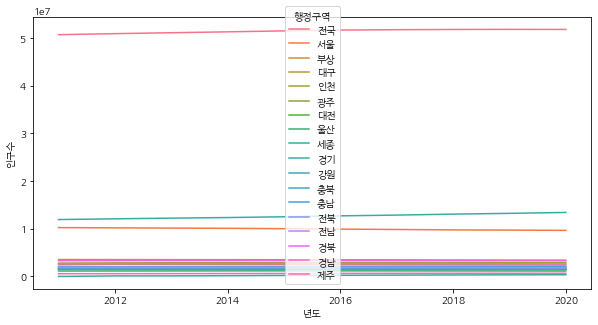

In [17]:
# 2011 ~ 2020년도 인구수 변화
plt.figure(figsize=(10, 5))
sns.lineplot(x='년도', y='인구수', hue='행정구역', data=df_all)

In [18]:
#2020년도에 인구수가 가장 많았던 도시?
df_2020_sort = df_all[df_all.년도==2020].drop(0).sort_values(by='인구수', ascending=False).reset_index()
df_2020_sort

,index,행정구역,년도,인구수,남자,여자
0,9,경기,2020,13427014,6754469,6672545.0
1,1,서울,2020,9668465,4701723,4966742.0
2,2,부상,2020,3391946,1661000,1730946.0
3,16,경남,2020,3340216,1681423,1658793.0
4,4,인천,2020,2942828,1473943,1468885.0
5,15,경북,2020,2639422,1329211,1310211.0
6,3,대구,2020,2418346,1193109,1225237.0
7,12,충남,2020,2121029,1082634,1038395.0
8,14,전남,2020,1851549,930615,920934.0
9,13,전북,2020,1804104,896874,907230.0


<AxesSubplot:xlabel='행정구역', ylabel='인구수'>

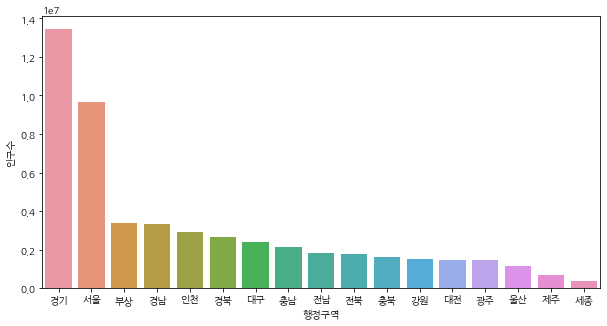

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='행정구역', y='인구수', data=df_2020_sort)

In [20]:
# 2011 vs 2020 인구가 가장 많이 늘은 지역, 줄어든 지역
df_2011_2020 = pd.merge(df_2011_all, df_2020_all, on='행정구역', how='inner')
df_2011_2020

,행정구역,년도_x,인구수_x,남자_x,년도_y,인구수_y,남자_y,여자
0,전국,2011,50734284,25406934,2020,51829023,25841029,25987994
1,서울,2011,10249679,5073899,2020,9668465,4701723,4966742
2,부상,2011,3550963,1762848,2020,3391946,1661000,1730946
3,대구,2011,2507271,1251577,2020,2418346,1193109,1225237
4,인천,2011,2801274,1410980,2020,2942828,1473943,1468885
5,광주,2011,1463464,725606,2020,1450062,717348,732714
6,대전,2011,1515603,759188,2020,1463882,730699,733183
7,울산,2011,1135494,583825,2020,1136017,583708,552309
8,세종,2011,0,0,2020,355831,177568,178263
9,경기,2011,11937415,6015357,2020,13427014,6754469,6672545


In [21]:
df_2011_2020.drop(0, inplace=True)
df_2011_2020

,행정구역,년도_x,인구수_x,남자_x,년도_y,인구수_y,남자_y,여자
1,서울,2011,10249679,5073899,2020,9668465,4701723,4966742
2,부상,2011,3550963,1762848,2020,3391946,1661000,1730946
3,대구,2011,2507271,1251577,2020,2418346,1193109,1225237
4,인천,2011,2801274,1410980,2020,2942828,1473943,1468885
5,광주,2011,1463464,725606,2020,1450062,717348,732714
6,대전,2011,1515603,759188,2020,1463882,730699,733183
7,울산,2011,1135494,583825,2020,1136017,583708,552309
8,세종,2011,0,0,2020,355831,177568,178263
9,경기,2011,11937415,6015357,2020,13427014,6754469,6672545
10,강원,2011,1536448,773278,2020,1542840,776505,766335


In [22]:
df_2011_2020['인구증감수'] = df_2011_2020.인구수_y - df_2011_2020.인구수_x
df_2011_2020

,행정구역,년도_x,인구수_x,남자_x,년도_y,인구수_y,남자_y,여자,인구증감수
1,서울,2011,10249679,5073899,2020,9668465,4701723,4966742,-581214
2,부상,2011,3550963,1762848,2020,3391946,1661000,1730946,-159017
3,대구,2011,2507271,1251577,2020,2418346,1193109,1225237,-88925
4,인천,2011,2801274,1410980,2020,2942828,1473943,1468885,141554
5,광주,2011,1463464,725606,2020,1450062,717348,732714,-13402
6,대전,2011,1515603,759188,2020,1463882,730699,733183,-51721
7,울산,2011,1135494,583825,2020,1136017,583708,552309,523
8,세종,2011,0,0,2020,355831,177568,178263,355831
9,경기,2011,11937415,6015357,2020,13427014,6754469,6672545,1489599
10,강원,2011,1536448,773278,2020,1542840,776505,766335,6392


In [23]:
df_2011_2020_sort = df_2011_2020.sort_values(by='인구증감수', ascending=False)
df_2011_2020_sort

,행정구역,년도_x,인구수_x,남자_x,년도_y,인구수_y,남자_y,여자,인구증감수
9,경기,2011,11937415,6015357,2020,13427014,6754469,6672545,1489599
8,세종,2011,0,0,2020,355831,177568,178263,355831
4,인천,2011,2801274,1410980,2020,2942828,1473943,1468885,141554
17,제주,2011,576156,288152,2020,674635,338609,336026,98479
11,충북,2011,1562903,787981,2020,1600837,811591,789246,37934
16,경남,2011,3308765,1664755,2020,3340216,1681423,1658793,31451
12,충남,2011,2101284,1063012,2020,2121029,1082634,1038395,19745
10,강원,2011,1536448,773278,2020,1542840,776505,766335,6392
7,울산,2011,1135494,583825,2020,1136017,583708,552309,523
5,광주,2011,1463464,725606,2020,1450062,717348,732714,-13402


<AxesSubplot:xlabel='행정구역', ylabel='인구증감수'>

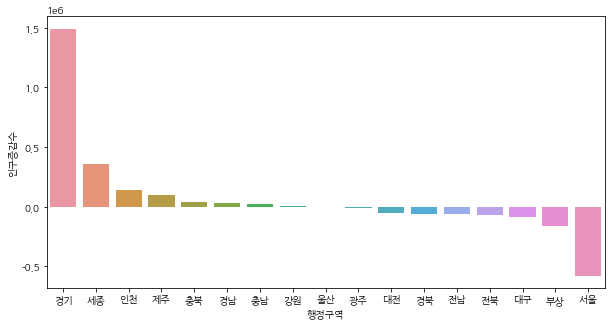

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x='행정구역', y='인구증감수', data=df_2011_2020_sort)